# The sentiment differences between the writing styles of Jane Austen and Charles Dickens.

# 1. Introduction, objectives and background

## 1.1 Introduction

I served at a watch brand company. One of my responsibilities is to write press releases or product copies. After 1 year of writing, I was thinking "Is it possible to build a system that can automatically generate certain writing style works?".

Additionally, I have experience in being a freelance translator and in using NMT(Neural Machine Translation). During my work, I feel that some of the NMT services are very close to human translators, however, on a certain level, I feel that translation somehow still needs more emotional, so I was wondering if it is possible to build or train a model that involves colors, which is related between color/data set/neural network with human emotion/reaction, inorder to perform more natural translation style.

## 1.2 Objective

◆ Sentiment trend analysis

◆ Author's sentiment orientation in writing  

◆ Speculate what books paragraphs are possible in this dataset  

◆ Prepare for CW 2.

## 1.3 Data

The datasets are downloaded from Kaggle and the license on the downloaded page is CC0(Public Domain). The dataset doesn't contain any information that can identify an individual human being. 

The reason I chose this dataset is that it contains both Jane Austen's and Charles Dickens's works but they are in paragraphs, meaning different writing styles could be covered than just in a single certain book for them. Therefore, this could be a good start for my CW 2.

Moreover, Jane Austen and Charles Dickens are separately regarded as the iconic authors of the 18th century and the 19th century. Jane Austen mostly writes from the third-person perspective and usually focuses on the upper class and the female perspective. Her books usually explore social class, marriage, and family life in a humorous way. Charles Dickens often uses first-person narration to attract the reader's attention. His works cover a wide range of social classes and are good at using detailed descriptions to explore class injustice, poverty, and the complexity of human nature. Therefore, choosing their works as my proposal is meaningful.

## 1.4 Methodology

The original 2 datasets contains a total of almost 170,000 lines. After a few times trials, I decided to randomly decrease both of them to 2,000 lines so that my laptop could process data well.

## 1.5 Limitations and constraints of the data

The datasets consist of paragraphs from different books by these two authors and randomly decreased the total lines, so there must be some bias compared to all of their works.

# 2. Preprocess Dataset

## 2.1 Jane Austen dataset

◆ Considering of data process limitation, we have to figure out how many lines and words is it.  

◆ 12,065 lines and 948,112 words are beyond my laptop's capability.

In [2]:
import os

current_dir = os.path.dirname(os.path.abspath('__file__'))
file_name_austen = 'austen.txt'
file_path_austen = os.path.join(current_dir, file_name_austen)

with open(file_path_austen, 'r', encoding='utf-8') as file:
    lines_austen = file.readlines()

line_count_austen = len(lines_austen)
word_count_austen = sum(len(line.split()) for line in lines_austen)

print(f'{file_name_austen} includes {line_count_austen} lines and {word_count_austen} words.')

austen.txt includes 12605 lines and 948112 words.


◆ Therefore, after few times trial, make it to 2000 lines is a good choice.

In [3]:
import random

current_dir = os.path.dirname(os.path.abspath('__file__'))
file_name_austen = 'austen.txt'
file_path_austen = os.path.join(current_dir, file_name_austen)

target_line_count = 2000

def random_remove_lines(file_path, target_line_count):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    if len(lines) > target_line_count:
        new_lines = random.sample(lines, target_line_count)

        with open(file_path, 'w', encoding='utf-8') as file:
            file.writelines(new_lines)
        print(f'{file_path} deleted {len(lines) - target_line_count} lines, now includes {target_line_count} lines.')
    else:
        print(f'{file_path} includes {len(lines)} lines.')

random_remove_lines(file_path_austen, target_line_count)

C:\Users\chang\austen.txt deleted 10605 lines, now includes 2000 lines.


## 2.2 Charles Dickens Datasest

◆ 150,763 lines and 7,968,290 words. The Great Charles Dickens.  

◆ Time to remove some lines again.

In [4]:
current_dir = os.path.dirname(os.path.abspath('__file__'))
file_name_dickens = 'dickens.txt'
file_path_dickens = os.path.join(current_dir, file_name_dickens)

with open(file_path_dickens, 'r', encoding='utf-8') as file:
    lines_dickens = file.readlines()

line_count_dickens = len(lines_dickens)
word_count_dickens = sum(len(line.split()) for line in lines_dickens)

print(f'{file_name_dickens} includes {line_count_dickens} lines and {word_count_dickens} words.')

dickens.txt includes 150763 lines and 7968290 words.


◆ Well, just make it 2,000 lines as well.

In [5]:
current_dir = os.path.dirname(os.path.abspath('__file__'))
file_name_dickens = 'dickens.txt'
file_path_dickens = os.path.join(current_dir, file_name_dickens)
target_line_count = 2000

def random_remove_lines(file_path, target_line_count):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    if len(lines) > target_line_count:
        new_lines = random.sample(lines, target_line_count)

        with open(file_path, 'w', encoding='utf-8') as file:
            file.writelines(new_lines)
        print(f'{file_path} deleted {len(lines) - target_line_count} lines, now includes {target_line_count} lines.')
    else:
        print(f'{file_path} includes {len(lines)} lines.')

random_remove_lines(file_path_dickens, target_line_count)

C:\Users\chang\dickens.txt deleted 148763 lines, now includes 2000 lines.


# 3. Writing Style Analysis

◆ Two datasets have been processed. We should create a data frame for WordCloud by removing stopwords and punctuation. I chose stopwords from the NLTK corpus and used regex to remove punctuations.

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import re

current_dir = os.path.dirname(os.path.abspath('__file__'))

def process_text_file(file_path, author):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        
        text = text.replace("\n", " ")
        text = re.sub(r'[^\w\s\']', '', text)
        words = nltk.tokenize.word_tokenize(text)
        
        stopwords_list = stopwords.words('english')
        words = [word for word in words if word.lower() not in stopwords_list]

        return {'Author': author, 'Text': text, 'Words': words}

file_names = ['austen.txt', 'dickens.txt']
authors = ['Jane Austen', 'Charles Dickens']

data_list = []

for i in range(len(file_names)):
    author = authors[i]
    file_name = file_names[i]
    file_path = os.path.join(current_dir, file_name)
    data = process_text_file(file_path, author)
    data_list.append(data)

corpus_df = pd.DataFrame(data_list, columns=['Author', 'Text', 'Words'])

print(corpus_df)

            Author                                               Text  \
0      Jane Austen  Every qualification is raised at times by the ...   
1  Charles Dickens  And in taking up this position we would have i...   

                                               Words  
0  [Every, qualification, raised, times, circumst...  
1  [taking, position, would, distinctly, understo...  


◆ To better illustrate in plots, I decided to sort sentiment analysis results in a Positive, Negative, and Neutral order in data frames.

In [7]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

current_dir = os.path.dirname(os.path.abspath('__file__'))
file_name_austen = 'austen.txt'
file_name_dickens = 'dickens.txt'
file_path_austen = os.path.join(current_dir, file_name_austen)
file_path_dickens = os.path.join(current_dir, file_name_dickens)

with open(file_path_austen, 'r', encoding='utf-8') as file:
    lines_austen = file.readlines()
with open(file_path_dickens, 'r', encoding='utf-8') as file:
    lines_dickens = file.readlines()

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    sentiments = []
    for line in lines:
        sentiment = analyzer.polarity_scores(line)
        sentiments.append(sentiment)
    
    return sentiments

sentiments_austen = analyze_sentiment(file_path_austen)
sentiments_dickens = analyze_sentiment(file_path_dickens)

sentiments_data_austen = {
    'Text Part': list(range(len(sentiments_austen))),
    'Positive': [sentiment['pos'] for sentiment in sentiments_austen],
    'Negative': [sentiment['neg'] for sentiment in sentiments_austen],
    'Neutral': [sentiment['neu'] for sentiment in sentiments_austen]                
}                      
sentiments_data_dickens = {
    'Text Part': list(range(len(sentiments_dickens))),
    'Positive': [sentiment['pos'] for sentiment in sentiments_dickens],
    'Negative': [sentiment['neg'] for sentiment in sentiments_dickens],
    'Neutral': [sentiment['neu'] for sentiment in sentiments_dickens]
}

df_austen = pd.DataFrame(sentiments_data_austen)
df_dickens = pd.DataFrame(sentiments_data_dickens)

sorted_sentiments_austen_pos = sorted(sentiments_austen, key=lambda x: x['pos'])
sorted_sentiments_dickens_pos = sorted(sentiments_dickens, key=lambda x: x['pos'])
sorted_sentiments_austen_neg = sorted(sentiments_austen, key=lambda x: x['neg'])
sorted_sentiments_dickens_neg = sorted(sentiments_dickens, key=lambda x: x['neg'])
sorted_sentiments_austen_neu = sorted(sentiments_austen, key=lambda x: x['neu'])
sorted_sentiments_dickens_neu = sorted(sentiments_dickens, key=lambda x: x['neu'])

df_austen['Positive_sorted'] = [sentiment['pos'] for sentiment in sorted_sentiments_austen_pos]
df_dickens['Positive_sorted'] = [sentiment['pos'] for sentiment in sorted_sentiments_dickens_pos]
df_austen['Negative_sorted'] = [sentiment['neg'] for sentiment in sorted_sentiments_austen_neg]
df_dickens['Negative_sorted'] = [sentiment['neg'] for sentiment in sorted_sentiments_dickens_neg]
df_austen['Neutral_sorted'] = [sentiment['neu'] for sentiment in sorted_sentiments_austen_neu]
df_dickens['Neutral_sorted'] = [sentiment['neu'] for sentiment in sorted_sentiments_dickens_neu]

print("Let's get start!")

Let's get start!


## 3.1 Sentiment Analysis - Positive Plot

◆ We can easily find that the line of Jane Austine is higher than the line of Charles Dickens, meaning that the writing style of Jane Austen is just like we find in the introduction sector: in a humorous way.

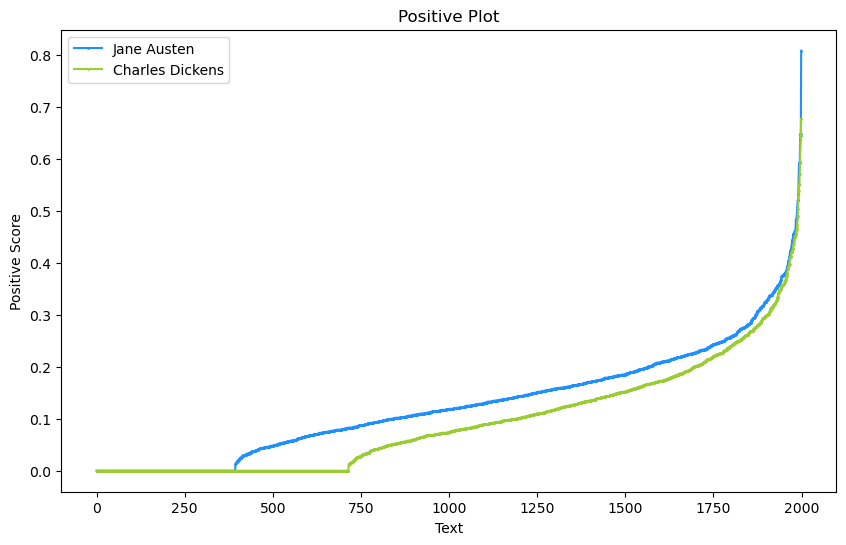

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_austen['Text Part'], df_austen['Positive_sorted'], label='Jane Austen', linestyle='-', marker='o', markersize=1, color='dodgerblue')
plt.plot(df_dickens['Text Part'], df_dickens['Positive_sorted'], label='Charles Dickens', linestyle='-', marker='o', markersize=1, color='yellowgreen')

plt.xlabel("Text")
plt.ylabel("Positive Score")
plt.legend()
plt.title("Positive Plot")
plt.show()

## 3.2 Sentiment Analysis - Negative Plot

◆ Although the slot here between the two authors is similar, the line between Jane Austen is less steep than Charles Dickens, meaning the style of writing of Jane Austen has low emotional fluctuations.

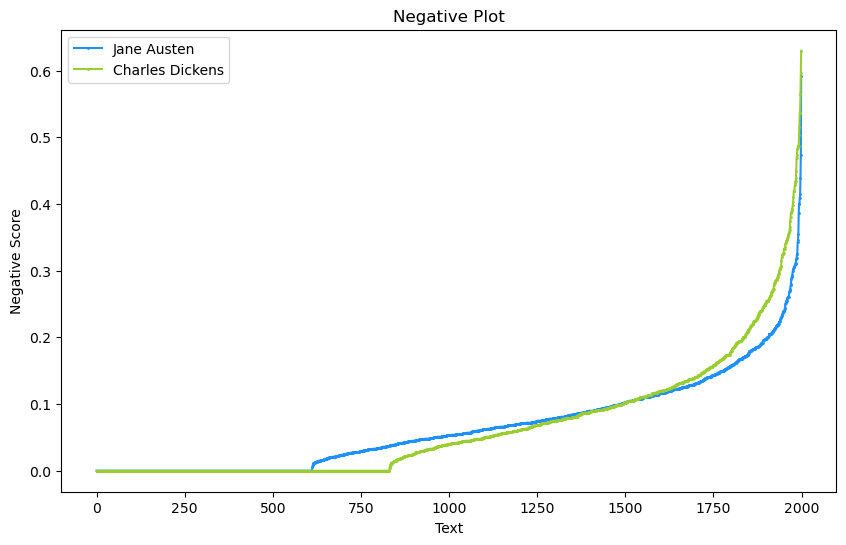

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df_austen['Text Part'], df_austen['Negative_sorted'], label='Jane Austen', linestyle='-', marker='o', markersize=1, color='dodgerblue')
plt.plot(df_dickens['Text Part'], df_dickens['Negative_sorted'], label='Charles Dickens', linestyle='-', marker='o', markersize=1, color='yellowgreen')

plt.xlabel("Text")
plt.ylabel("Negative Score")
plt.legend()
plt.title("Negative Plot")
plt.show()

## 3.3 Sentiment Analysis - Neutral Plot

◆ Obviously, the negative score of Charles Dickens's data set is higher than Jane Austen's, reflecting that Charles Dickens's writing style is close to our introduction "...explore class injustice, poverty, and the complexity of human nature."

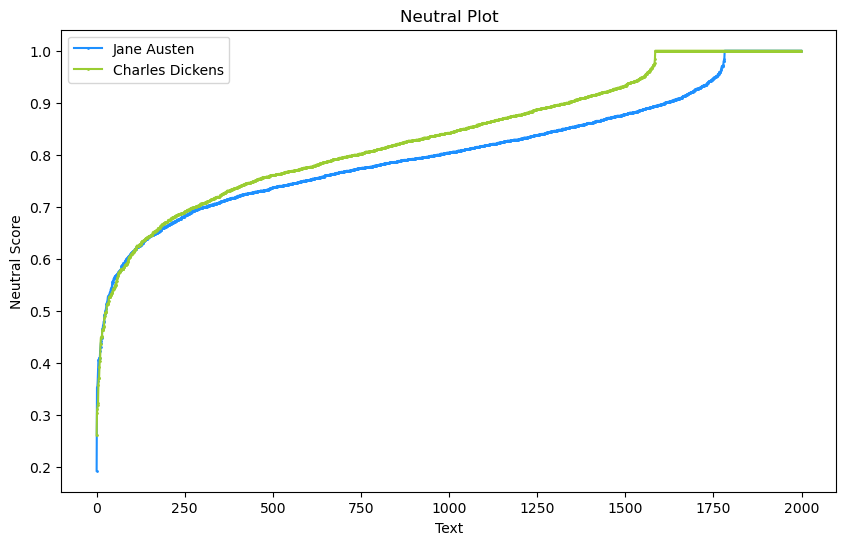

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(df_austen['Text Part'], df_austen['Neutral_sorted'], label='Jane Austen', linestyle='-', marker='o', markersize=1, color='dodgerblue')
plt.plot(df_dickens['Text Part'], df_dickens['Neutral_sorted'], label='Charles Dickens', linestyle='-', marker='o', markersize=1, color='yellowgreen')

plt.xlabel("Text")
plt.ylabel("Neutral Score")
plt.legend()
plt.title("Neutral Plot")
plt.show()

## 3.4 Sentiment Analysis - Box Plot

◆ Median: The median among 5 boxes is fair, but in Dickens Negative box, the median and lower quartile are closer to the minimum, which means there's more negative score here.  

◆ Qutliers: Except Austen Neutral box, the others have more qutliers, which means both writers' styles in sentiment are varieties.  

◆ Interquartile Range: As above, we can conclude that both writers demonstrated wide emotional fluctuations, especially Charles Dickens.  

◆ Overall, the emotion fluctuations in the Charles Dickens dataset is with a higher sentiment limit.

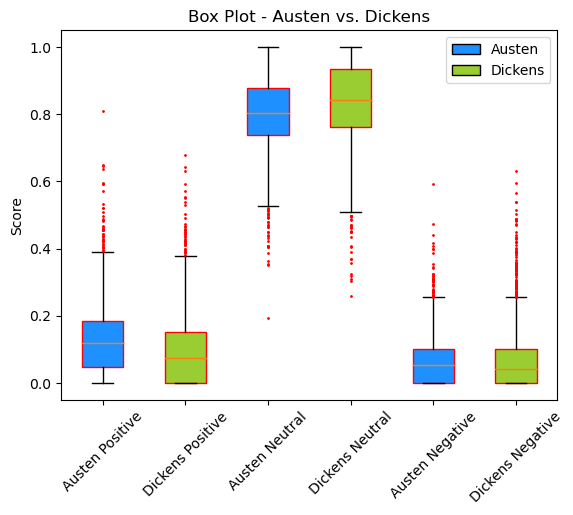

In [19]:
import matplotlib.patches as mpatches

positions = [1, 2, 3, 4, 5, 6]

data = {
    'Austen Positive': df_austen['Positive'],
    'Dickens Positive': df_dickens['Positive'],
    'Austen Neutral': df_austen['Neutral'],
    'Dickens Neutral': df_dickens['Neutral'],
    'Austen Negative': df_austen['Negative'],
    'Dickens Negative': df_dickens['Negative'],
}

box_colors = {
    'Austen Positive': 'dodgerblue',
    'Dickens Positive': 'yellowgreen',
    'Austen Neutral': 'dodgerblue',
    'Dickens Neutral': 'yellowgreen',
    'Austen Negative': 'dodgerblue',
    'Dickens Negative': 'yellowgreen',
}

flierprops = dict(marker='o', markersize=1, markerfacecolor='red', markeredgecolor='red')

bplot1 = plt.boxplot(
    data.values(),
    positions=positions,
    showfliers=True,
    patch_artist=True,
    flierprops=flierprops
)

for patch, color in zip(bplot1['boxes'], [box_colors[key] for key in data.keys()]):
    patch.set_facecolor(color)
    patch.set_edgecolor('red')

legend_labels = [
    mpatches.Patch(facecolor='dodgerblue', edgecolor='black', label='Austen.txt'),
    mpatches.Patch(facecolor='yellowgreen', edgecolor='black', label='Dickens.txt')
]

plt.legend(legend_labels, ['Austen', 'Dickens'])
plt.title('Box Plot - Austen vs. Dickens')
plt.ylabel('Score')
plt.xticks(positions, data.keys(), rotation=45)

plt.show()

## 3.5 Sentiment Analysis - Box Plot Closer View

◆ Apparently, the box size of positive and neutral of the Charle Dickens is bigger than negative one, which means even thought the sentiment fluctuation is higher, it overall tends to be positive.  

◆ Otherwise, the box size of 3 Jane Austen are almost the same, which means the sentiment is evenly distributed throughout her works.

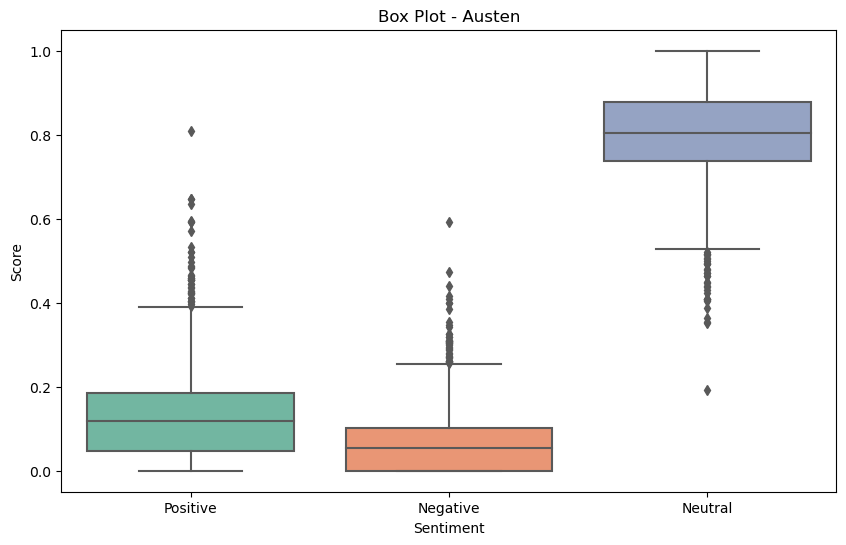

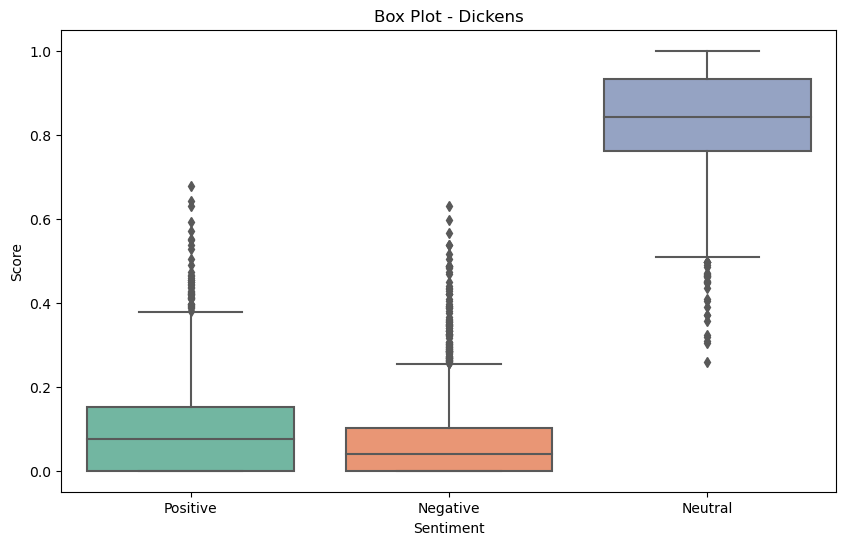

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_austen[['Positive', 'Negative', 'Neutral']], palette='Set2')
plt.title('Box Plot - Austen')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_dickens[['Positive', 'Negative', 'Neutral']], palette='Set2')
plt.title('Box Plot - Dickens')
plt.xlabel('Sentiment')
plt.ylabel('Score')
plt.show()

## 3.5 WordCloud

◆ In the Jane Austen WordCloud, we can identify some names, such as Elinor, Elizabeth, Marianne, atherine, Georgiana, Mary, Anne, and Harriet, so we can conclude the data set includes paragraphs of her works "Sense and Sensibility", "Pride and Prejudice", "Northanger Abbey", "Persuasion", and "Emma".  

◆ In the Charles Dickens WordCloud, we can identify two names, which are "Oliver" and "Pickwick", so the dataset must include "The Pickwick Papers" and the famous "Oliver Twist".

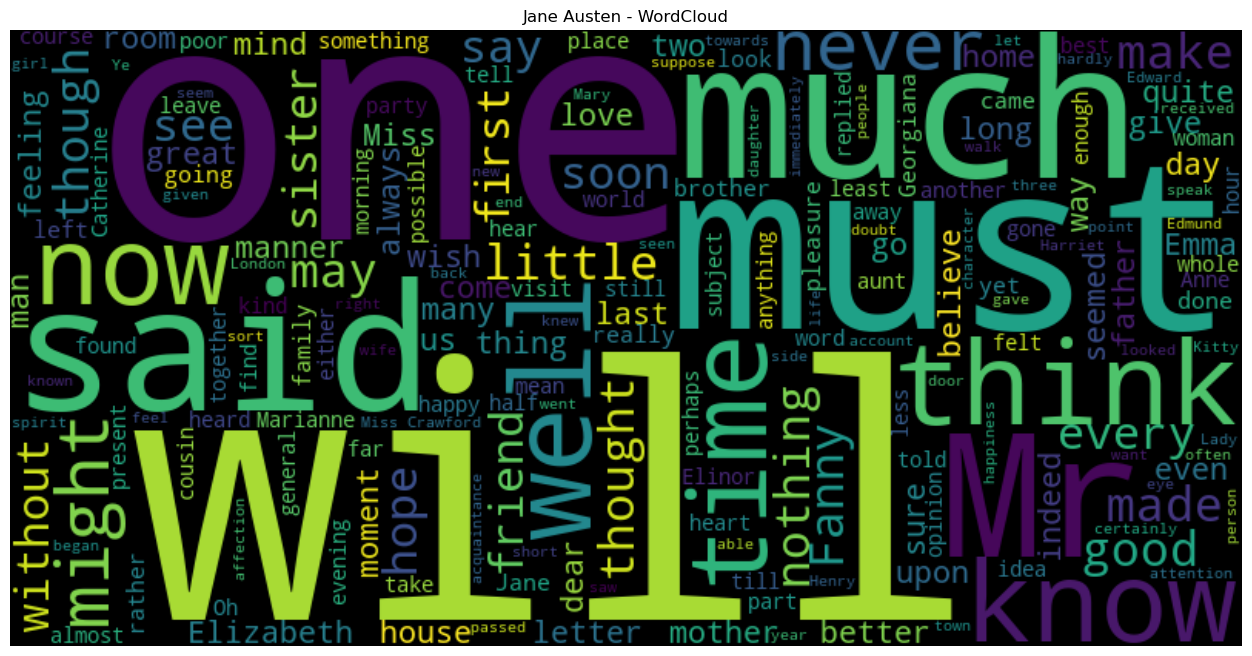

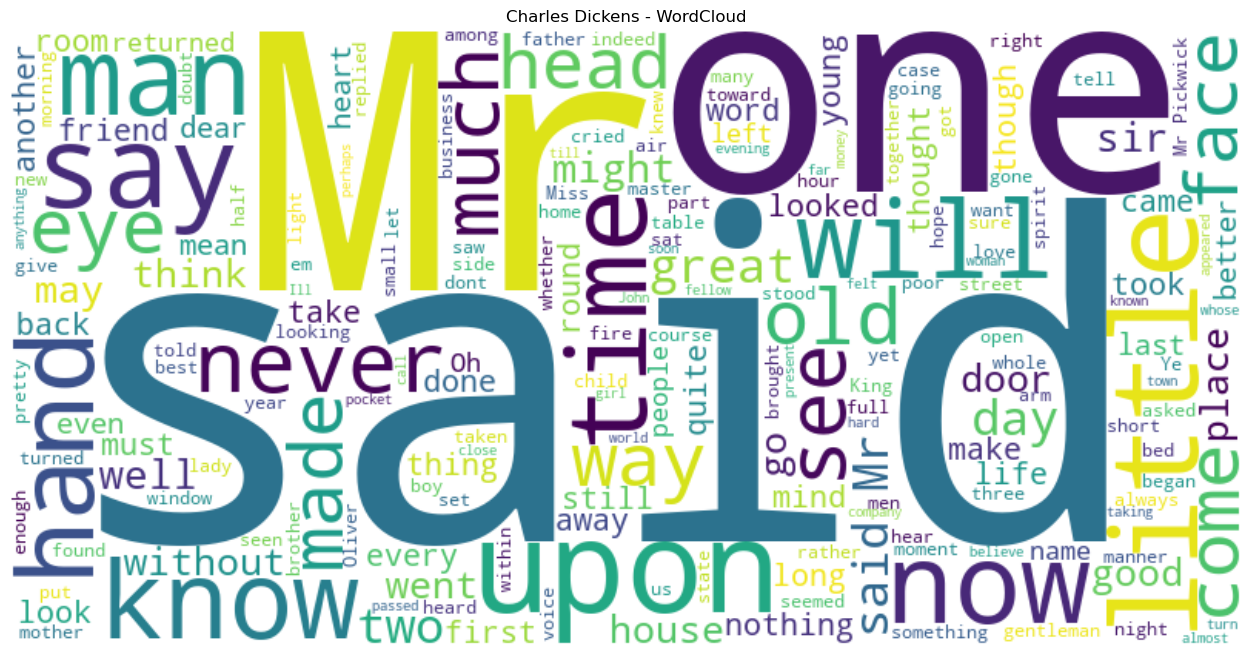

In [20]:
from wordcloud import WordCloud

text_austen = ' '.join(corpus_df[corpus_df['Author'] == 'Jane Austen']['Text'])
text_dickens = ' '.join(corpus_df[corpus_df['Author'] == 'Charles Dickens']['Text'])

wordcloud_austen = WordCloud(width=800, height=400, background_color='black').generate(text_austen)
wordcloud_dickens = WordCloud(width=800, height=400, background_color='white').generate(text_dickens)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_austen, interpolation='bilinear')
plt.title('Jane Austen - WordCloud')
plt.axis('off')
plt.show()

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud_dickens, interpolation='bilinear')
plt.title('Charles Dickens - WordCloud')
plt.axis('off')
plt.show()

# 4. Conclusions

Through this proposal, we can find that sentiment analysis is useful for studying authors' writing styles. The results illustrate the consistency with the public's perception of the author, and perhaps helpful for studying the author's life and living background and psychological analysis. It may also be applied to analyze books or articles as one of the analysis methods or factors whether an article is popular.

# 5. Futher Research

"The color of words”.  

Color psychology has been developed for a period. Most of the research about psychology is about what words people would associate with a certain color, seems there's a lack of a system to let people freely express their color, but humans could have different emotional reactions toward the same words/sentences/conversation under various situation, such as different time period, different places, different gender, different ages, different language users, even different weather. For example, the sentence "I like a sunny day", could be red to me, but it could be red+white+blue+yellow to another person.  The idea of designing a color panel is to apply to some word-based social platform or a side project for some tech giants, or it could also be an option to build a simple free APP to let people mark the color of given words/sentences/paragraph/article/context, so that we can possibilly build a data gathering system.  In the book Sentiment Analysis: Mining Opinions, Sentiments, and Emotions (Chapter 13-3, 2020, Bing Liu, University of Illinois, Chicago), the author mentioned that perhaps using a color bar to mark reviews could make reviews be easier read or understood, which fits my idea that color could be solution.

At last,  this proposal was going to be according to the Munsell color system and PAD system to measure the color between the paragraphs of piece work of two authors Jane Austen(18th century) and Charles Dickens(19th century).this is an experimental proposal for further developing a different sentiment analysis system, unfortunately, it couldn't be done in CW1. I 'll try to manage to finish this project as my CW 2.

# 6. References and Rescource Used

1. 【停用词】NLP中的停用词怎么获取？我整理了6种方法 Available: https://blog.51cto.com/mgnb/6684795 
2. *Python Natural Language Processing Cookbook: Over 50 recipes to understand, analyze, and generate text for implementing language processing tasks.* 2021. Zhenya Antić.
3. Python-Natural-Language-Processing-Cookbook. Available: 
https://github.com/AD2000X/Python-Natural-Language-Processing-Cookbook/tree/master
4. Python Matplotlib 折线图 线条颜色和样式. Available: https://blog.csdn.net/Sarahing/article/details/126120163  
5. McGrath S., Blake A., Stapleton G., Touloumis A., Chapman P., Jamnik M., and Shams Z. *Evaluating Colour in Concept Diagrams: Study Materials.* Available: https://research.gold.ac.uk/id/eprint/31899/1/dataSetTidy_forWeb.xlsx
6. 使用 Nltk 處理文字資料. 2019. Available: https://wenwender.wordpress.com/2019/03/09/%E4%BD%BF%E7%94%A8-nltk-%E8%99%95%E7%90%86%E6%96%87%E5%AD%97%E8%B3%87%E6%96%99/
7. Matplotlib. API Reference. Available:https://matplotlib.org/stable/api/index.html
8. *Python和NLTK自然语言处理[印度] 2019. Nitin Hardeniya.
9. *Introducing Python. Bill Lubanovic. 2019
10. *手把手教你分析和製作箱型圖（盒鬚圖），建議收藏！*Available: https://www.finereport.com/tw/data-analysis/how-to-make-box-plot.html
11. wordcloud绘制词云图. Available: https://blog.csdn.net/qq_42370313/article/details/90606645
12. Cleaning Text with python and re. Available: https://stackoverflow.com/questions/55187374/cleaning-text-with-python-and-re
13. Python: os.path.abspath() method with example. Available: https://www.geeksforgeeks.org/python-os-path-abspath-method-with-example/
14. Difference between os.path.dirname(os.path.abspath(__file__)) and os.path.dirname(__file__). Available: https://stackoverflow.com/questions/38412495/difference-between-os-path-dirnameos-path-abspath-file-and-os-path-dirnam

In [21]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
